In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
def remove_iqr_outliers(df, column):
    Q1 = df[column].quantile(0.20)
    Q3 = df[column].quantile(0.80)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(lower_bound, upper_bound)
    
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    # return df[(df[column] < upper_bound)]

In [ ]:
data = pd.read_csv(r'../data/processed/TopDown/max/STD/Image_15_max_STD.csv')
entropy = pd.read_csv(r'../data/processed/TopDown/max/Entropy/Image_15_max_Entropy.csv')
depth = pd.read_csv(r'../data/processed/TopDown/max/STD/Image_15_max_STD.csv')
data.head()

,x,y,max_STD,depth_value
0,0,0,0.187542,1.635802
1,0,1,0.180687,1.634016
2,0,2,0.173892,1.632593
3,0,3,0.174478,1.631468
4,0,4,0.174651,1.630676


In [ ]:
new_df = pd.DataFrame()

new_df['max_STD'] = data['max_STD']
new_df['max_Entropy'] = entropy['max_Entropy']
new_df['depth_value'] = depth['depth_value'] 
new_df['x'] = depth['x'] 
new_df['y'] = depth['y'] 

In [ ]:
# new_df = new_df[(new_df['depth_value'] >= 0.0)&(new_df['depth_value'] <= 0.009)]
# new_df = remove_iqr_outliers(new_df, 'max_STD')
# new_df = new_df[(new_df['max_STD'] >= 0.0)&(new_df['max_STD'] <= 0.07)]
new_df["label"] = np.where(new_df['depth_value'] <= 0.05, 1, 0)

new_df.head()

,max_STD,max_Entropy,depth_value,x,y,label
0,0.187542,2.779532,1.635802,0,0,0
1,0.180687,2.779532,1.634016,0,1,0
2,0.173892,2.692549,1.632593,0,2,0
3,0.174478,2.692549,1.631468,0,3,0
4,0.174651,2.692549,1.630676,0,4,0


In [ ]:
from sklearn.utils import resample

max_labels = new_df[new_df.label == 0]
min_labels = new_df[new_df.label == 1]

max_down = resample(max_labels,
                    replace=False,
                    n_samples=len(min_labels),     # match minority
                    random_state=42)

df_balanced = pd.concat([max_down, min_labels])


In [ ]:
df_balanced['label'].value_counts()

label
0    47866
1    47866
Name: count, dtype: int64

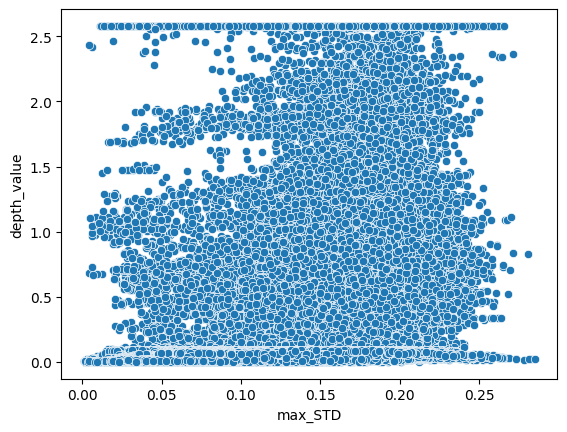

In [ ]:
sns.scatterplot(x=df_balanced['max_STD'], y=df_balanced['depth_value'])
# sns.boxplot(new_df['max_STD'])
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from lazypredict.Supervised import LazyClassifier

# Feature importance analysis with Random Forest
# X = combined_df[features[0:1], features[3:4]]
# y = combined_df['depth_value']

X = df_balanced[['max_STD', 'max_Entropy']]
y = df_balanced['label']

X= X.to_numpy()
y= y.to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Feature scaling
# scaler = StandardScaler()
# # scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Train MLP Regressor Model
# model = MLPClassifier(hidden_layer_sizes=(64,16), activation='relu', solver='adam', max_iter=2000, random_state=42)

# model = SVC(kernel="linear", C=0.025, random_state=42)

# model = SVC(gamma=2, C=1, random_state=42)
# model = GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42)

# model.fit(X_train_scaled, y_train)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

# # Evaluate model
# predictions = model.predict(X_test_scaled)
# print("\nMLP Classification Evaluation:")
# print(f'accuracy_score: {accuracy_score(y_test, predictions):.4f}')
# print(f'classification_report: {classification_report(y_test, predictions)}')
# print(f'R^2 Score: {r2_score(y_test, predictions):.4f}')

# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# cm = confusion_matrix(y_test, predictions, labels=None)  # labels=None ⇒ inferred
# print("Confusion matrix (rows = actual, cols = predicted):")
# print(cm)

# # Optional: pretty plotted version
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(values_format='d')          # integer formatting
# plt.title("Confusion Matrix")
# plt.show()


# results = pd.DataFrame()
# results['max_STD'] = pd.Series(X_test[:, 0:1].ravel())
# results['max_Entropy'] = pd.Series(X_test[:, 1:].ravel())
# results['label'] = pd.Series(y_test)
# results['predictions'] = pd.Series(predictions)

  0%|          | 0/29 [00:00<?, ?it/s]

In [ ]:
results.head(50)

NameError: name 'results' is not defined